## __Prostý ťah/tlak__ ##

$$D.T.$$

Načítanie potrebných knižníc pre riešenie problému

In [1]:
%matplotlib inline
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
from IPython.core.display import Image
sp.init_printing()

## Príklad 1

Pri prúte zaťaženom podľa obrázku určite bezpečnosť vzhľadom k medznému stavu pružnosti. Daný prút je uložený medzi dve dokonale tuhé steny. Prút je ohrievaný, pričom teplota stúpne o ΔT=40 K. Dané parametre:

\begin{align*}
l_1=& 90\, mm\\
l_2=& 100\, mm\\
D=& 30\, mm\\
d=& 24\, mm\\
E=& 2,1*10^5\, MPa\\
α=& 12,5x10^{-6}\, K^{-1}\\
r=& 2mm\\
\end{align*}

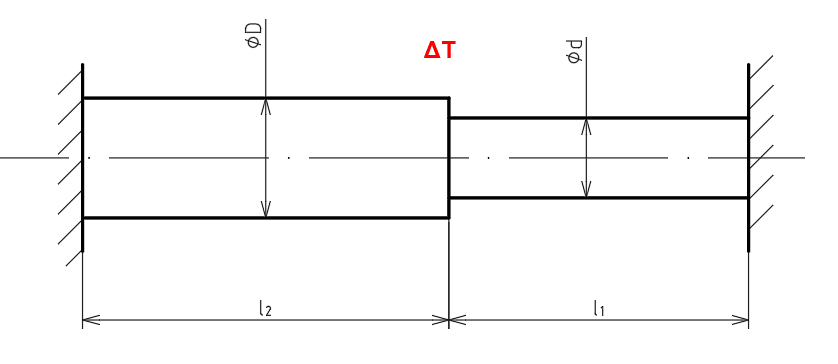

In [2]:
Image(filename='Tah1.PNG', width = 900, height=500)

Ako vyplýva zo statického rozboru, daná úloha je jedenkrát staticky neurčitá a vyžaduje čiastočné uvoľnenie, ktoré bolo prevedené nasledujúcim spôsobom:

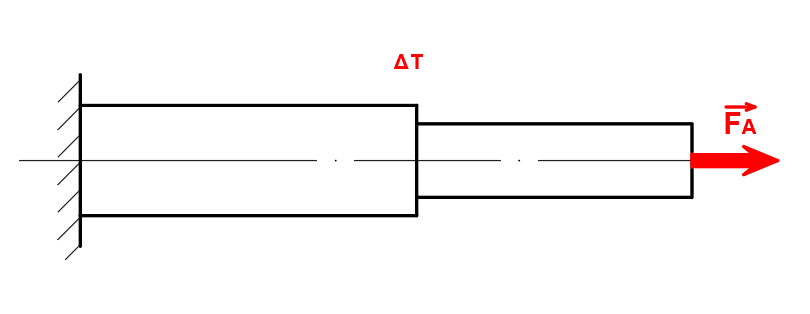

In [3]:
Image(filename='Tah1b.PNG', width=900, height=500)

Premenné využívané v nasledujúcich výpočtoch boli zavedené ako symboly nasledujúco:

In [4]:
ΔT=sp.symbols('ΔT')
x,l1,l2=sp.symbols('x l_1 l_2')
D,d=sp.symbols('D d')
E=sp.symbols('E')
α=sp.symbols('α')
FA=sp.symbols('F_A')
x1,x2=sp.symbols('x_1 x_2')

Výsledné vnútorné účinky pre $x_1∈(0,l_1),\,\,  x_2∈(0,l_2)$ majú tvar

In [5]:
N1=FA
N2=FA
N1,N2

Ďalej vyjadríme plochy priečnych prierezov (kruhové prirezy)

In [6]:
S1=sp.pi*d**2/4
S2=sp.pi*D**2/4
S1,S2

Energia napätosti prútu má nasledujúci tvar $$W=\int\limits_{0}^{l_1}\frac{N_1^2}{2ES}dx + \int\limits_{0}^{l_2}\frac{N_2^2}{2ES}dx$$

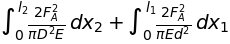

In [7]:
dW1=N1**2/(2*E*S1)
dW2=N2**2/(2*E*S2)
W=sp.Integral(dW1,[x1,0,l1])+sp.Integral(dW2,[x2,0,l2])
W

Derivácia potenciálnej energie podľa neznámej sily $F_A$ má tvar $$\frac{\partial{W}}{\partial{F_A}}$$

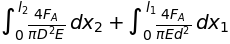

In [8]:
dWFA=W.diff(FA)
dWFA

Deformačná podmienka, keďže daná úloha je jedenkrát staticky neurčitá, je v podobe $$\frac{\partial{W}}{\partial{F_A}}=\Delta{T}\alpha(l_1+l_2)$$

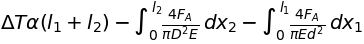

In [9]:
rovnica=ΔT*α*(l1+l2) -dWFA
rovnica

Po integrácii

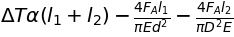

In [10]:
rovnica_i=rovnica.doit()
rovnica_i

Riešenie predchádzajúcej rovnice pre neznámu silu $F_A$

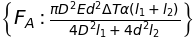

In [11]:
rovnica_v=sp.solve([rovnica_i],[FA])
rovnica_v

Dosadenie čísel pre numerický výpočet

In [12]:
l1_,l2_,ΔT_=90.,100.,40.
α_=12.5e-6
E_=2.1e5
D_,d_=30.,24.


Výpočet hodnoty sily $F_A$

In [19]:
FA_vysledok=rovnica_v[FA].subs({D:D_,E:E_,d:d_,l1:l1_,l2:l2_,ΔT:ΔT_,α:α_})
round(float(FA_vysledok),2)

Výsledné vnútorné účinky $N_1, N_2$

In [23]:
N1_=N1.subs({FA:FA_vysledok})
N2_=N2.subs({FA:FA_vysledok})
round(float(N1_),2), round(float(N2_),2)

Plochy jednotlivých priečnych prierezov

In [24]:
S1_=S1.subs({d:d_})
S2_=S2.subs({D:D_})
round(float(S1_),2), round(float(S2_),2)

Výpočet hodnôt nominálnych napätí

In [15]:
sigma1=N1_/S1_
sigma2=N2_/S2_
float(sigma1),float(sigma2)

Súčiniteľ koncentrácie napätia v prechode odsadeného drieku pre $$\frac{D}{d}=1.25, \,\,\, \frac{r}{D}=0.0667$$
pre dané priemery je $\alpha =1.95$

Výpočet skutočných napätí

In [ ]:
alfa=1.95
sigma1_=alfa*sigma1
sigma2_=sigma2
float(sigma1_),float(sigma2_)

Výpočet bzpečnosti vzhľadom k medznému stavu pružnosti

In [17]:
sigmaK=380
k=sigmaK/sigma1_
k